ELMED219-2021 -> Lab3_BRATS -> MRI-BRATS_001-explore.ipynb  (**Under construction!!**)

# BRATS_001 - Exploration

In this session we are dealing with the multispectral MRI BRATS_001 dataset from the skull-stripped head of a patient with glioma. 

Check: 
- https://www.med.upenn.edu/sbia/brats2017.html
- http://medicaldecathlon.com  [[Download](https://drive.google.com/file/d/1A2IU8Sgea1h3fYLpYtFb2v7NYdMjvEhU/view?usp=sharing)] BrainTumor data (7 GB!) License: [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0)
- http://github.com/MIC-DKFZ/nnUNet

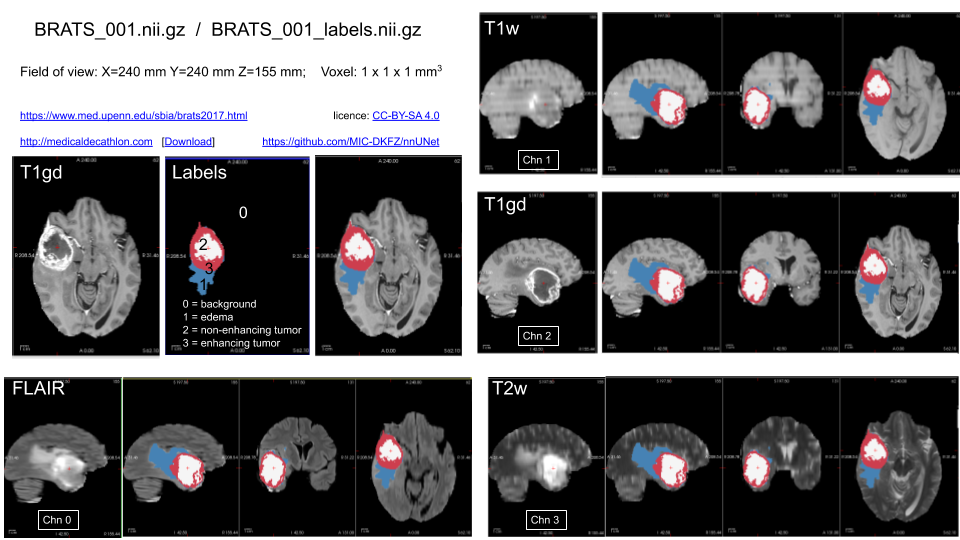

In [1]:
from IPython.display import Image
Image(filename='./assets/BRATS_001_multispectral.png', width=900)

**Import libraries and functions to be used**

In [2]:
%matplotlib inline
# This to be able to display figures and graphs within the notebook browser

# Supress some warnings:
import warnings
warnings.filterwarnings('ignore')


import os
import pathlib
import glob
import shutil
import warnings
import numpy as np
import pandas as pd
import nibabel as nib
import scipy
import cv2
from nilearn import image
from nilearn import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
import skimage
import IPython

from mcq import *  # MCQ for the Lab

home = os.path.expanduser('~')  # home is to make path to local home directory
#print('home: %s' % home)

# Multispectral data and (pathological) tissue types

**Define directories, channel names ([MRI pulse sequences](https://radiopaedia.org/articles/mri-pulse-sequences-1)) and class labels being used**


In [3]:
mydata = './data'
chn_names = ['FLAIR', 'T1w', 'T1gd', 'T2w']
class_names = ['background', 'edema', 'non-enhancing_tumor', 'enhancing_tumor']

In [4]:
images = [nib.load(f'%s/BRATS_001_000%d.nii.gz' % (mydata, k)) for k in range(len(chn_names))]
msk = nib.load("%s/BRATS_001_labels.nii.gz" % mydata)

Object type of images: <class 'list'>
Object type of image 0: <class 'nibabel.nifti1.Nifti1Image'>
Voxel dimensions [mm] of image 0: (1.0, 1.0, 1.0)
Object type of image 0 data: <class 'numpy.ndarray'>
Data type of image 0 data: float64
Number of images: 4
Shape of image 0: (240, 240, 155)
Shape of squeezed image 0: (240, 240, 155)
Minimum SI of image 0: 0.0
Maximum SI of image 0: 1829.0


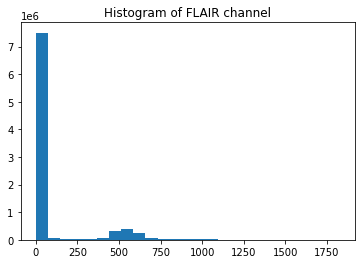

In [5]:
# Check the result,                        by operating on a list of images
print('Object type of images:',            type(images))
print('Object type of image 0:',           type(images[0]))
print('Voxel dimensions [mm] of image 0:', images[0].header.get_zooms())
print('Object type of image 0 data:',      type(images[0].get_fdata()))
print('Data type of image 0 data:',        images[0].get_fdata().dtype)
print('Number of images:',                 len(images))
print('Shape of image 0:',                 images[0].get_fdata().shape)
print('Shape of squeezed image 0:',        images[0].get_fdata().squeeze().shape)
print('Minimum SI of image 0:',            images[0].get_fdata().min())
print('Maximum SI of image 0:',            images[0].get_fdata().max())
plt.hist(                                  images[0].get_fdata().squeeze().flatten(), bins='auto')
plt.title("Histogram of %s channel" % chn_names[0])
plt.show()

Using nibabel concat_images to construct a multispectral image from k channel images having the same n×n image matrix

In [6]:
# Concatenate images
img_mult = nib.concat_images(images)

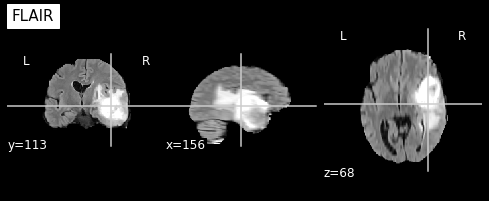

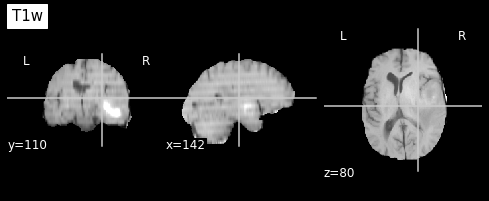

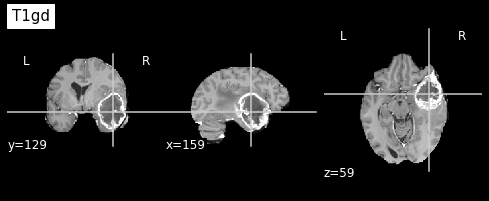

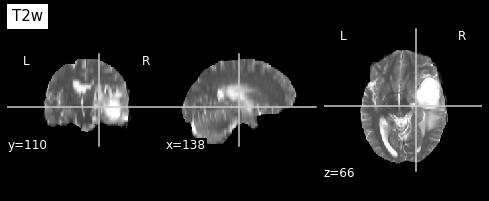

In [7]:
for i, chn in enumerate(chn_names):
    plotting.plot_anat(images[i], dim=-0.8, title='%s' % chn)
    plotting.show()